Predicting Stocks
ethereum
startdate is 20170101
enddate is 20190725
https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20170101&end=20190725
   index       Date   Open   High   Low  Close    Volume  Market Cap
0    934 2017-01-01   7.98   8.47  7.98   8.17  14731700   715049208
1    933 2017-01-02   8.17   8.44  8.05   8.38  14579600   733331654
2    932 2017-01-03   8.37  10.00  8.32   9.73  33625200   851512055
3    931 2017-01-04   9.71  11.28  9.56  11.25  41051200   985515893
4    930 2017-01-05  11.29  11.89  9.40  10.25  41557400   898497892
Linear regression confidence score:  0.9380592825240475
Linear regression prediction for  ethereum   [272.99382358 280.2301157  273.7193621  233.73837079 235.83861389
 206.63568828 218.36840995]
Quadratic Regression 2 confidence score:  0.9385193225812967
Quadratic Regression 2 prediction for  ethereum   [281.01808428 288.82721611 281.8018984  238.33036763 240.62812785
 208.53799318 221.46716493]
Quadratic Regression 3 con

C:\Users\BTCNODE\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\BTCNODE\Anaconda3\lib\site-packages\ipykernel_launcher.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


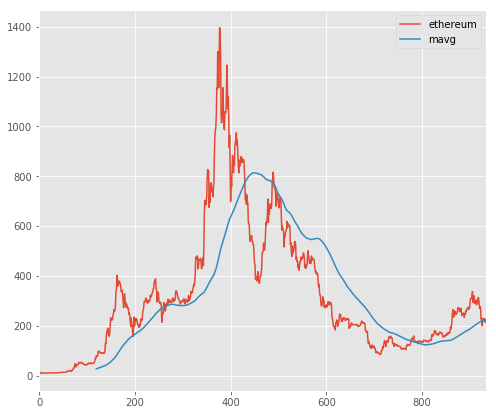

In [4]:

from datetime import datetime
import numpy as np
import pandas as pd
import time
import os

from sklearn import svm

from sklearn.preprocessing import MinMaxScaler

#For Prediction
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor


## Step1: Read the market chart information and load it as a "CSV" file
def get_historical_data(stockname, startdate, enddate):

    print ("startdate is " + startdate)
    print ("enddate is " + enddate)
    
    url = "https://coinmarketcap.com/currencies/" + stockname + "/historical-data/?start="+ startdate + "&end=" +enddate
    print (url)
    
    # get market info for stock from the start date to end date
    market_info = pd.read_html(url)[0]
    
    # convert the date string to the correct date format
    market_info = market_info.assign(Date=pd.to_datetime(market_info['Date']))

    # sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
    # this will remove those asterisks
    market_info.columns = market_info.columns.str.replace("*", "")      
    
    market_info = market_info.sort_values('Date')

    market_info.reset_index(inplace=True)
    
    # look at the first few rows
    print (market_info.head())
 
    return market_info
        
    # Write stock price information to csv file
    #market_info.to_csv(csv_file, sep=',', encoding='utf-8')

def predictData(stock, days):
    print(stock)

    start = datetime(2017, 1, 1)
    end = datetime.now()
    
    startdate=start.strftime("%Y%m%d")
    enddate=end.strftime("%Y%m%d")

    #Outputting the Historical data into a .csv for later use
    df = get_historical_data(stock, startdate, enddate)
    
    #if os.path.exists('./Exports'):
    #    csv_name = ('Exports/' + stock + '_Export.csv')
    #else:
    #    os.mkdir("Exports")
    #    csv_name = ('Exports/' + stock + '_Export.csv')
    #df.to_csv(csv_name)    
    
    ## Moving average plotting
    close_px = df['Close']
    mavg = close_px.rolling(window=120).mean()
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    from matplotlib import style

    # Adjusting the size of matplotlib
    import matplotlib as mpl
    mpl.rc('figure', figsize=(8, 7))
    mpl.__version__
    
    # Adjusting the style of matplotlib
    style.use('ggplot')


    close_px.plot(label=stock)
    mavg.plot(label='mavg')
    plt.legend()
    
    
    ## Linear regression prediction model

    forecast_out = int(days)

    df = df[['Close']]
    
    df['Prediction'] = df['Close'].shift(-forecast_out)
    df.dropna(inplace=True)
    
    X = np.array(df.drop(['Prediction'], 1))
    X = preprocessing.scale(X)
    
    
    X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
    X = X[:-forecast_out] # remove last 30 from X
    
    y = np.array(df['Prediction'])
    y = y[:-forecast_out]
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        
    
    # Training
    clf = LinearRegression()
    clf.fit(X_train,y_train)

    # Testing
    confidence = clf.score(X_test, y_test)
    print("Linear regression confidence score: ", confidence)
    
    forecast_prediction = clf.predict(X_forecast)
    print("Linear regression prediction for ", stock, " ", forecast_prediction)    
    
    # Quadratic Regression 2
    clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
    clfpoly2.fit(X_train, y_train)
    
    confidence = clfpoly2.score(X_test, y_test)
    print("Quadratic Regression 2 confidence score: ", confidence)

    forecast_prediction = clfpoly2.predict(X_forecast)
    print("Quadratic Regression 2 prediction for ", stock, " ", forecast_prediction)    
    
    # Quadratic Regression 3
    clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
    clfpoly3.fit(X_train, y_train)
    
    confidence = clfpoly3.score(X_test, y_test)
    print("Quadratic Regression 3 confidence score: ", confidence)

    forecast_prediction = clfpoly3.predict(X_forecast)
    print("Quadratic Regression 3 prediction for ", stock, " ", forecast_prediction)        
    
    # KNN Regression
    clfknn = KNeighborsRegressor(n_neighbors=2)
    clfknn.fit(X_train, y_train)
    
    confidence = clfknn.score(X_test, y_test)
    print("KNN Regression confidence score: ", confidence)

    forecast_prediction = clfknn.predict(X_forecast)
    print("KNN Regression prediction for ", stock, " ", forecast_prediction)    

    
 
if __name__ == '__main__':
    print ("Predicting Stocks")
    #predictData("bitcoin",7)
    predictData("ethereum", 7)
    #predictData('binance-coin', 7)
    #predictData('stellar', 7)
    #predictData('chainlink', 7)
    #predictData('basic-attention-token', 7)
    #predictData('huobi-token', 7)
    #predictData('coinpoker', 7)
    
    #from pandas_datareader import data
    
    # Only get the adjusted close.
    #aapl = data.DataReader("AAPL",  start='2015-1-1', end='2015-12-31', data_source='yahoo')['Adj Close']
    
    #aapl.plot(title='AAPL Adj. Closing Price')